### 경기도 아파트 매매가격 - 아파트거래량 상관관계 분석

In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [7]:
file_path = "./data/가공data/경기도_주택가격(아파트중위매매가격).csv"
df_price = pd.read_csv(file_path)
df_price

,Unnamed: 0,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,수원시,223279,218183,232548,254323,267236,275195,296356,311484,396809,499071
1,성남시,484754,452339,459503,487148,510663,533477,644188,736353,883722,1008313
2,의정부시,197583,188750,187916,194583,201750,206166,231958,232333,240875,330000
3,안양시,308162,289657,297884,324310,339863,351472,402311,444364,507285,622496
4,부천시,240015,229261,240441,251803,262430,266541,293958,314625,336500,446958
5,광명시,295125,286125,300875,346000,373875,379458,399750,475916,585666,701333
6,평택시,155666,158916,172125,178458,182833,188541,176500,175750,178583,229833
7,동두천시,134625,122583,124500,124833,127541,132250,143666,139541,137083,188291
8,안산시,229958,223637,231115,252408,264743,268677,271497,248243,272931,388925
9,고양시,262284,245070,255616,269753,282028,291520,316249,332344,367903,497836


In [8]:
df_price = df_price.rename(columns={"Unnamed: 0" : "경기도시군별"})
df_price

,경기도시군별,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,수원시,223279,218183,232548,254323,267236,275195,296356,311484,396809,499071
1,성남시,484754,452339,459503,487148,510663,533477,644188,736353,883722,1008313
2,의정부시,197583,188750,187916,194583,201750,206166,231958,232333,240875,330000
3,안양시,308162,289657,297884,324310,339863,351472,402311,444364,507285,622496
4,부천시,240015,229261,240441,251803,262430,266541,293958,314625,336500,446958
5,광명시,295125,286125,300875,346000,373875,379458,399750,475916,585666,701333
6,평택시,155666,158916,172125,178458,182833,188541,176500,175750,178583,229833
7,동두천시,134625,122583,124500,124833,127541,132250,143666,139541,137083,188291
8,안산시,229958,223637,231115,252408,264743,268677,271497,248243,272931,388925
9,고양시,262284,245070,255616,269753,282028,291520,316249,332344,367903,497836


In [9]:
file_path2 = "./data/가공data/경기도_아파트거래량.csv"
df_trade = pd.read_csv(file_path2)
df_trade

,경기도시군별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,수원시,15145.0,22405.0,19063.0,25181.0,29368.0,28166.0,25618.0,30907.0,32057.0,30513.0,51903.0,30244.0
1,화성시,11450.0,10891.0,6803.0,10027.0,15284.0,33748.0,27527.0,36493.0,50722.0,44214.0,37359.0,28615.0
2,용인시,19695.0,16433.0,13371.0,20502.0,22462.0,25813.0,22529.0,31608.0,53362.0,32942.0,33970.0,24788.0
3,평택시,7032.0,10013.0,6441.0,8353.0,8497.0,11936.0,15683.0,19535.0,23991.0,24648.0,28252.0,22482.0
4,고양시,14540.0,19297.0,14425.0,20213.0,20453.0,26925.0,26771.0,27957.0,25831.0,23319.0,32680.0,17961.0
5,파주시,11358.0,5208.0,6098.0,7192.0,6857.0,10750.0,8294.0,8817.0,18161.0,9202.0,20591.0,16147.0
6,안양시,7094.0,8467.0,7485.0,8204.0,10995.0,13113.0,13564.0,12843.0,18237.0,15941.0,16112.0,15317.0
7,성남시,9226.0,8923.0,6141.0,10470.0,13017.0,15291.0,21524.0,23781.0,13446.0,23780.0,19236.0,13196.0
8,의정부시,3282.0,4990.0,3785.0,6360.0,7802.0,10557.0,9784.0,19177.0,12455.0,15351.0,16435.0,12411.0
9,오산시,6216.0,6291.0,2520.0,4302.0,4376.0,4734.0,3965.0,8273.0,6530.0,7878.0,8908.0,12309.0


In [10]:
df_price_181920 = df_price[["경기도시군별", "2019년", "2020년", "2021년"]]
df_trade_181920 = df_trade[["경기도시군별", "2019년", "2020년", "2021년"]]

In [11]:
df_price_trade = pd.merge(left = df_price_181920, 
                          right = df_trade_181920,
                          left_on= "경기도시군별",
                          right_on= "경기도시군별", 
                          how="left")
df_price_trade

,경기도시군별,2019년_x,2020년_x,2021년_x,2019년_y,2020년_y,2021년_y
0,수원시,311484,396809,499071,30513.0,51903.0,30244.0
1,성남시,736353,883722,1008313,23780.0,19236.0,13196.0
2,의정부시,232333,240875,330000,15351.0,16435.0,12411.0
3,안양시,444364,507285,622496,15941.0,16112.0,15317.0
4,부천시,314625,336500,446958,16471.0,17181.0,10733.0
5,광명시,475916,585666,701333,6620.0,10638.0,6006.0
6,평택시,175750,178583,229833,24648.0,28252.0,22482.0
7,동두천시,139541,137083,188291,1400.0,2530.0,3205.0
8,안산시,248243,272931,388925,11991.0,22059.0,10236.0
9,고양시,332344,367903,497836,23319.0,32680.0,17961.0


In [12]:
df_price_trade.columns = ["경기도시", "2019년 아파트가격", "2020년 아파트가격", "2021년 아파트가격", \
 "2019년 아파트거래량", "2020년 아파트거래량", "2021년 아파트거래량" ]

In [30]:
df_price_trade.to_csv("./data/가공data/2019~2021 경기도 아파트가격 거래량.csv")

In [13]:
df_price_trade_top15 = df_price_trade.sort_values("2021년 아파트가격", ascending=False).head(15)
df_price_trade_top15 = df_price_trade_top15.reset_index(drop=True)
df_price_trade_top15

,경기도시,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량
0,과천시,1112500,1258958,1495583,5110.0,4137.0,2794.0
1,성남시,736353,883722,1008313,23780.0,19236.0,13196.0
2,하남시,545416,709583,879166,12658.0,9712.0,6706.0
3,광명시,475916,585666,701333,6620.0,10638.0,6006.0
4,구리시,418458,528083,642291,3050.0,4240.0,2471.0
5,안양시,444364,507285,622496,15941.0,16112.0,15317.0
6,의왕시,383791,440541,611884,7635.0,5451.0,3534.0
7,용인시,383517,428304,587185,32942.0,33970.0,24788.0
8,화성시,272916,357666,505458,44214.0,37359.0,28615.0
9,수원시,311484,396809,499071,30513.0,51903.0,30244.0


In [14]:
df_price_trade_top20 = df_price_trade.sort_values("2021년 아파트가격", ascending=False).head(20)
df_price_trade_top20 = df_price_trade_top20.reset_index(drop=True)
df_price_trade_top20

,경기도시,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량
0,과천시,1112500,1258958,1495583,5110.0,4137.0,2794.0
1,성남시,736353,883722,1008313,23780.0,19236.0,13196.0
2,하남시,545416,709583,879166,12658.0,9712.0,6706.0
3,광명시,475916,585666,701333,6620.0,10638.0,6006.0
4,구리시,418458,528083,642291,3050.0,4240.0,2471.0
5,안양시,444364,507285,622496,15941.0,16112.0,15317.0
6,의왕시,383791,440541,611884,7635.0,5451.0,3534.0
7,용인시,383517,428304,587185,32942.0,33970.0,24788.0
8,화성시,272916,357666,505458,44214.0,37359.0,28615.0
9,수원시,311484,396809,499071,30513.0,51903.0,30244.0


In [15]:
df_price_trade_set = df_price_trade.set_index("경기도시").astype(int)

In [16]:
df_price_trade_set

,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량
경기도시,,,,,,
수원시,311484,396809,499071,30513,51903,30244
성남시,736353,883722,1008313,23780,19236,13196
의정부시,232333,240875,330000,15351,16435,12411
안양시,444364,507285,622496,15941,16112,15317
부천시,314625,336500,446958,16471,17181,10733
광명시,475916,585666,701333,6620,10638,6006
평택시,175750,178583,229833,24648,28252,22482
동두천시,139541,137083,188291,1400,2530,3205
안산시,248243,272931,388925,11991,22059,10236


In [17]:
df_price_trade_set_asc = df_price_trade_set.sort_values("2021년 아파트가격", ascending=False)

In [18]:
df_price_trade_set_asc

,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량
경기도시,,,,,,
과천시,1112500,1258958,1495583,5110,4137,2794
성남시,736353,883722,1008313,23780,19236,13196
하남시,545416,709583,879166,12658,9712,6706
광명시,475916,585666,701333,6620,10638,6006
구리시,418458,528083,642291,3050,4240,2471
안양시,444364,507285,622496,15941,16112,15317
의왕시,383791,440541,611884,7635,5451,3534
용인시,383517,428304,587185,32942,33970,24788
화성시,272916,357666,505458,44214,37359,28615


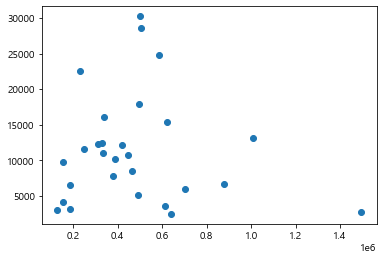

In [19]:
plt.scatter(df_price_trade_set_asc["2021년 아파트가격"], df_price_trade_set_asc["2021년 아파트거래량"])

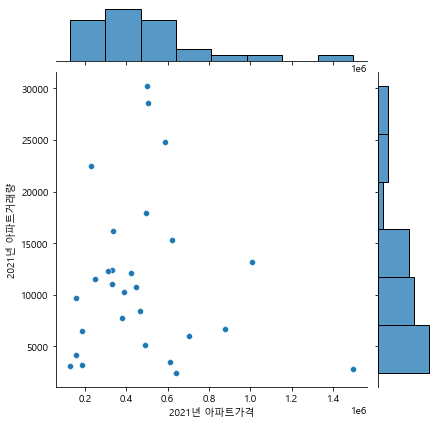

In [20]:
sns.jointplot(x="2021년 아파트가격", y="2021년 아파트거래량", data=df_price_trade_set_asc, kind="scatter")

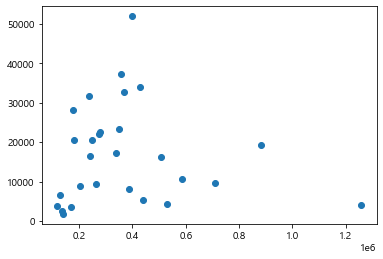

In [21]:
plt.scatter(df_price_trade_set_asc["2020년 아파트가격"], df_price_trade_set_asc["2020년 아파트거래량"])

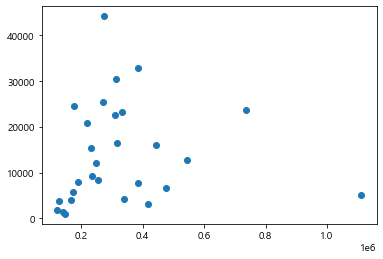

In [22]:
plt.scatter(df_price_trade_set_asc["2019년 아파트가격"], df_price_trade_set_asc["2019년 아파트거래량"])

In [23]:
# plt.figure(figsize=(30,20))

# sns.set_palette("pastel")
# sns.stripplot(x="경기도시", y="2021년 아파트가격", data = df_price_trade_top15)
# plt.title("파스텔 톤 그래프")
# plt.xlabel("")
# plt.ylabel("")
# plt.show()

In [24]:
df_price_trade_set.corr()

,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량
2019년 아파트가격,1.000000,0.994194,0.988037,0.069900,-0.074114,-0.125680
2020년 아파트가격,0.994194,1.000000,0.993750,0.096400,-0.049933,-0.102035
2021년 아파트가격,0.988037,0.993750,1.000000,0.146778,-0.007160,-0.067666
2019년 아파트거래량,0.069900,0.096400,0.146778,1.000000,0.871906,0.851639
2020년 아파트거래량,-0.074114,-0.049933,-0.007160,0.871906,1.000000,0.895514
2021년 아파트거래량,-0.125680,-0.102035,-0.067666,0.851639,0.895514,1.000000


In [25]:
df_price_trade_set_asc

,2019년 아파트가격,2020년 아파트가격,2021년 아파트가격,2019년 아파트거래량,2020년 아파트거래량,2021년 아파트거래량
경기도시,,,,,,
과천시,1112500,1258958,1495583,5110,4137,2794
성남시,736353,883722,1008313,23780,19236,13196
하남시,545416,709583,879166,12658,9712,6706
광명시,475916,585666,701333,6620,10638,6006
구리시,418458,528083,642291,3050,4240,2471
안양시,444364,507285,622496,15941,16112,15317
의왕시,383791,440541,611884,7635,5451,3534
용인시,383517,428304,587185,32942,33970,24788
화성시,272916,357666,505458,44214,37359,28615


In [26]:
df_price_top15 = df_price.sort_values("2021년", ascending=False).head(15)
df_price_top15 = df_price_top15.reset_index(drop=True)
df_price_top15

,경기도시군별,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,과천시,608333,563333,611750,637583,697666,755666,862291,1112500,1258958,1495583
1,성남시,484754,452339,459503,487148,510663,533477,644188,736353,883722,1008313
2,하남시,273958,259541,270708,303583,329541,349208,438250,545416,709583,879166
3,광명시,295125,286125,300875,346000,373875,379458,399750,475916,585666,701333
4,구리시,277416,261125,266000,281958,295583,304000,379583,418458,528083,642291
5,안양시,308162,289657,297884,324310,339863,351472,402311,444364,507285,622496
6,의왕시,288583,284583,304083,323916,337083,343333,380166,383791,440541,611884
7,용인시,330282,310210,317778,332279,346459,345664,360387,383517,428304,587185
8,화성시,231250,221041,227041,236833,246750,261791,264083,272916,357666,505458
9,수원시,223279,218183,232548,254323,267236,275195,296356,311484,396809,499071


In [27]:
df_trade_top15 = df_trade.sort_values("2021년", ascending=False).head(15)
df_trade_top15

,경기도시군별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,수원시,15145.0,22405.0,19063.0,25181.0,29368.0,28166.0,25618.0,30907.0,32057.0,30513.0,51903.0,30244.0
1,화성시,11450.0,10891.0,6803.0,10027.0,15284.0,33748.0,27527.0,36493.0,50722.0,44214.0,37359.0,28615.0
2,용인시,19695.0,16433.0,13371.0,20502.0,22462.0,25813.0,22529.0,31608.0,53362.0,32942.0,33970.0,24788.0
3,평택시,7032.0,10013.0,6441.0,8353.0,8497.0,11936.0,15683.0,19535.0,23991.0,24648.0,28252.0,22482.0
4,고양시,14540.0,19297.0,14425.0,20213.0,20453.0,26925.0,26771.0,27957.0,25831.0,23319.0,32680.0,17961.0
5,파주시,11358.0,5208.0,6098.0,7192.0,6857.0,10750.0,8294.0,8817.0,18161.0,9202.0,20591.0,16147.0
6,안양시,7094.0,8467.0,7485.0,8204.0,10995.0,13113.0,13564.0,12843.0,18237.0,15941.0,16112.0,15317.0
7,성남시,9226.0,8923.0,6141.0,10470.0,13017.0,15291.0,21524.0,23781.0,13446.0,23780.0,19236.0,13196.0
8,의정부시,3282.0,4990.0,3785.0,6360.0,7802.0,10557.0,9784.0,19177.0,12455.0,15351.0,16435.0,12411.0
9,오산시,6216.0,6291.0,2520.0,4302.0,4376.0,4734.0,3965.0,8273.0,6530.0,7878.0,8908.0,12309.0
